The imports

In [1]:
import numpy
import pandas as pd
import yfinance as yf
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kashy\AppData\Local\Temp\ipykernel_22548\43834346.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Outputting the price table of a certain stock, which is currently Apple

In [2]:
stock = 'AAPL'

data_for_stock = yf.Ticker(stock)
data_for_stock = data_for_stock.history(period="8y")

del data_for_stock["Dividends"]

data_for_stock

c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:777: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Stock Splits
Date,,,,,,
2016-04-04 00:00:00-04:00,25.235566,25.640085,25.201284,25.395546,149424800,0.0
2016-04-05 00:00:00-04:00,25.027594,25.306415,25.007024,25.096155,106314800,0.0
2016-04-06 00:00:00-04:00,25.192146,25.363552,24.956746,25.358980,105616400,0.0
2016-04-07 00:00:00-04:00,25.128151,25.235566,24.709921,24.805908,127207600,0.0
2016-04-08 00:00:00-04:00,24.890467,25.087012,24.721345,24.833332,94326800,0.0
...,...,...,...,...,...,...
2024-03-26 00:00:00-04:00,170.000000,171.419998,169.580002,169.710007,57388400,0.0
2024-03-27 00:00:00-04:00,170.410004,173.600006,170.110001,173.309998,60273300,0.0
2024-03-28 00:00:00-04:00,171.750000,172.229996,170.509995,171.479996,65672700,0.0


The below is to plot the stocks over time.

c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The Stock Price')

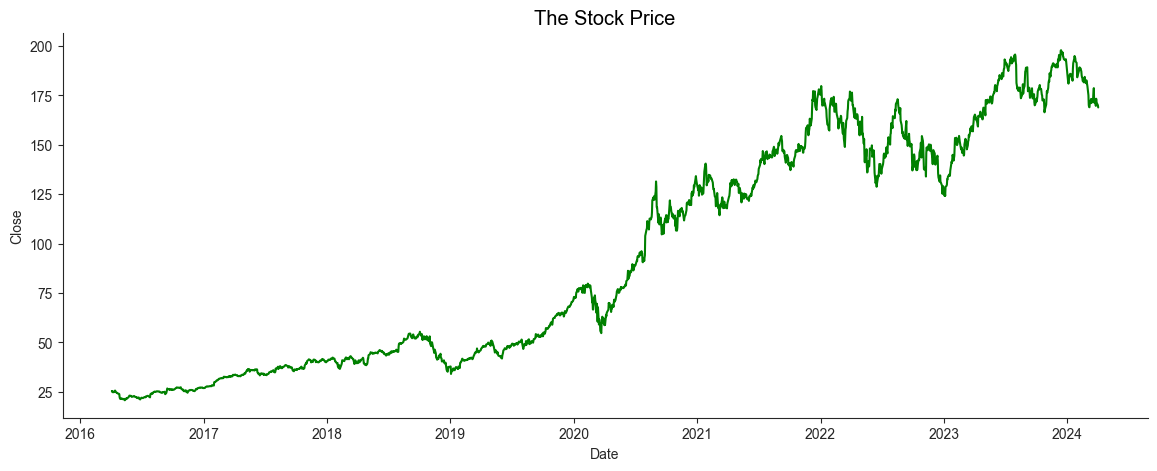

In [3]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=data_for_stock,x="Date",y='Close',color='green')
sns.despine()
plt.title("The Stock Price",size='x-large',color='black')

Creating the training and testing data

In [4]:
import sklearn

60


c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

Text(0.5, 1.0, 'The Training Data')

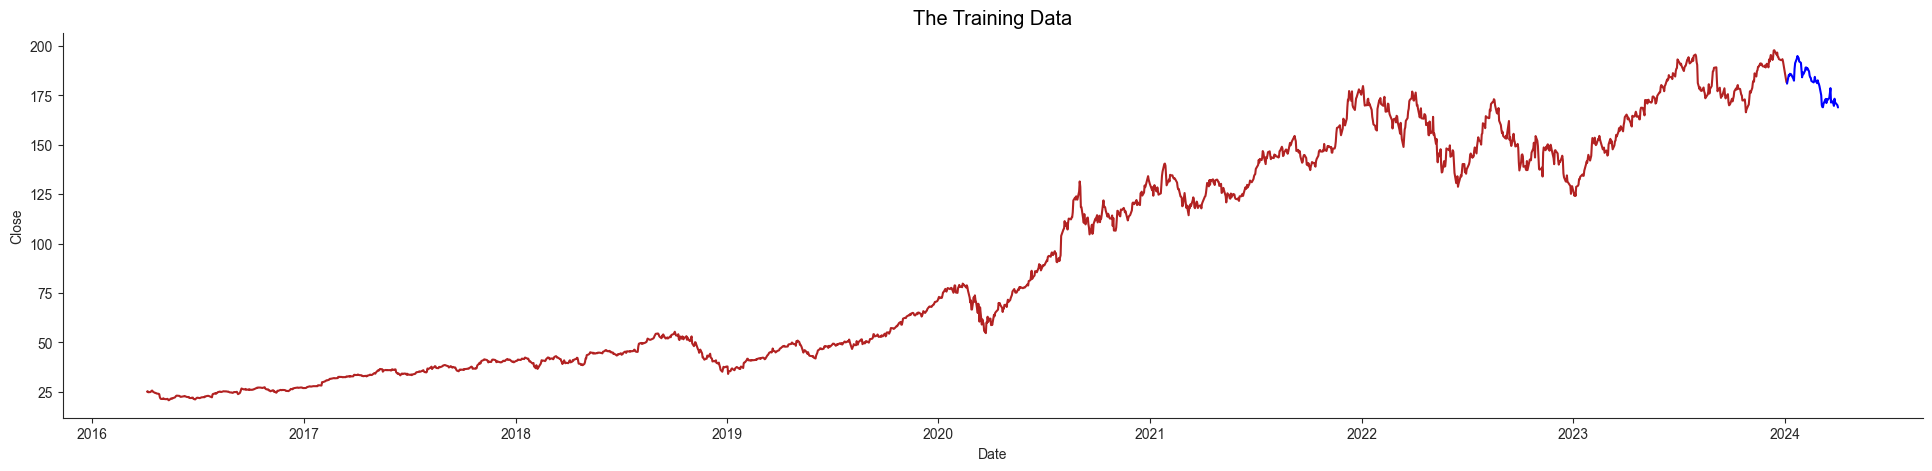

In [5]:
train_d = data_for_stock[-1*len(data_for_stock)+ 1:-60]
test_d = data_for_stock[-60:]

print(len(test_d))

plt.figure(figsize=(24,5))
sns.set_style("ticks")
sns.lineplot(data=train_d,x="Date",y='Close',color='firebrick')
sns.lineplot(data=test_d,x="Date", y='Close', color='blue')
sns.despine()
plt.title("The Training Data",size='x-large',color='black')

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=1)
predictors = ["Open", "Low","High","Volume"]
model = model.fit(train_d[predictors], train_d["Close"])

In [7]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor(max_depth=10, random_state=0)
# predictors = ["Open", "High", "Low", "Volume"]
# model = model.fit(train_d[predictors], train_d["Close"])

In [8]:
from sklearn.metrics import explained_variance_score

predictions = model.predict(test_d[predictors])

count = 0
print("Predicted\t\tActual")

for i in range(len(test_d)):
    print(str(predictions[i]) + "\t" + str(test_d["Close"][i]))
    if (abs(test_d["Close"][i] - predictions[i]) <= 0.01* test_d["Close"][i]):
        count += 1
print("\n" + str(count / len(test_d)))
explained_variance_score(test_d["Close"], predictions)

Predicted		Actual
181.8970518459744	180.9490966796875
182.94338265506806	185.32351684570312
184.3674720594618	184.904052734375
184.79658905077736	185.9527130126953
185.21267044551786	185.35348510742188
186.06986184353298	185.6830596923828
182.33005071391756	183.39598083496094
182.1510494249132	182.4471893310547
187.5729951104058	188.38961791992188
190.33841672148532	191.3158721923828
193.7654992881654	193.6428985595703
194.9745428982689	194.93125915527344
195.37509763832693	194.2521209716797
193.87159653472904	193.92254638671875
192.50953598295854	192.17477416992188
190.42755951775445	191.48565673828125
189.63764115598974	187.80035400390625
185.39104843284971	184.1649932861328
185.6633354523674	186.6218719482422
182.40621659172905	185.6131591796875
187.90959385172528	187.44081115722656
188.06900323825414	189.0587615966797
189.53604193535057	189.1686248779297
188.83835756937663	188.08001708984375
189.27729768089011	188.85000610351562
187.5923853217231	187.14999389648438
184.700292765783

C:\Users\kashy\AppData\Local\Temp\ipykernel_22548\1179273876.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(str(predictions[i]) + "\t" + str(test_d["Close"][i]))
C:\Users\kashy\AppData\Local\Temp\ipykernel_22548\1179273876.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (abs(test_d["Close"][i] - predictions[i]) <= 0.01* test_d["Close"][i]):


0.9815519838524618